# BMI504-Spring 2018: Class 6 Statistics I

## Central Limit Theorem Example

### Central Limit Theorem

Let $X_1, X_2, ... , X_n$ are iid random variables with (finite) mean $\mu$ and (finite) variance $\sigma^2$. If the sample size n is "sufficiently large," then:

(1) the sample mean $\bar{X}=\frac{\sum_{i=1}^n}{n} X_i$ follows an approximate normal distribution

(2) with mean $E(\bar{X})=\mu$

(3) and variance $Var(\bar{X})=\frac{\sigma^2}{n}$

We write:

 $$\bar{X}⟶N(\mu,\frac{\sigma^2}{n})\ as \ n\rightarrow\infty$$
 
 ### Example
 
Let X be the random variable associated to drawing a fair dice with out-
comes 1,2,3,4,5,6. Suppose $X_1, · · · , X_30$ be i.i.d as X.

a) Find the distribution of the random variable $\bar{X}$ using CLT.
Plot this distribution.

b)This time do not use the CLT, instead by running a simulation in R find the mean and variance 
of $\bar{X}. You can use the “sample” function in R to roll your dice!

c) Plot the distribution found in the first and second part in the same graph.

 
a) X is a discrete random variable

the mean of X: $\mu=\sum_{i=1}^6 (i)(\frac{1}{6})=3.5$

the varaiance of X: $sigma^2=\sum_{i=1}^6 (x_i -\mu)^2 p_i=\frac{1}{6}\sum_{i=1}^6 (x_i -3.5)^2$=3.5

By the central limit theorem, for large n:  $$\bar{X}\sim N(\mu,\frac{\sigma^2}{n})=N(3.5,\frac{3.5}{30}=0.117)$$



In [1]:
x=seq(2.5,4.5,0.001)

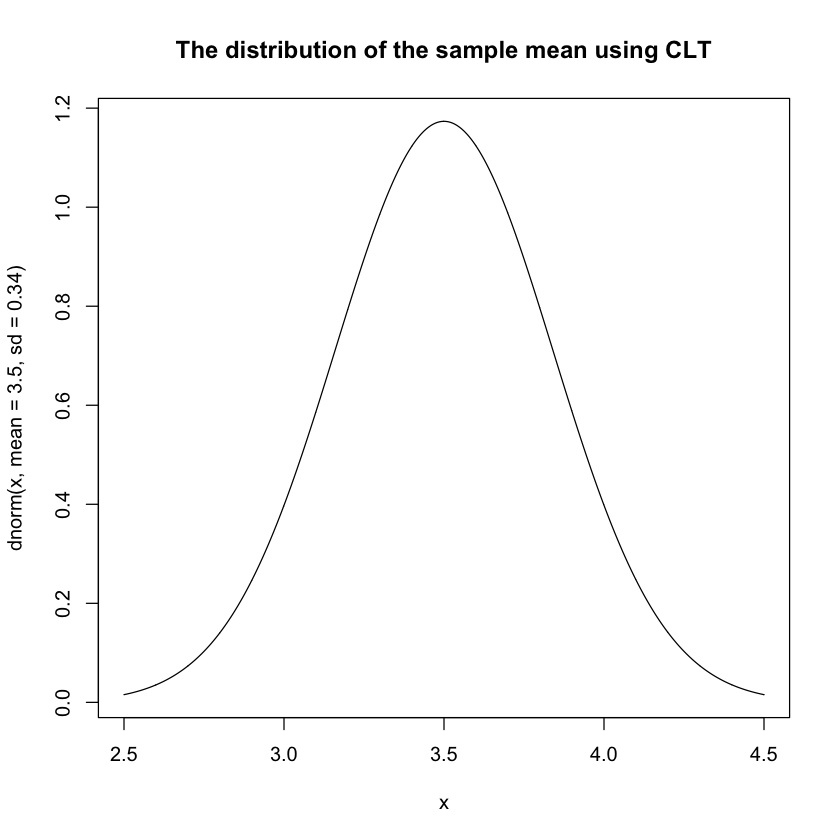

In [2]:
plot(x,dnorm(x,mean=3.5,sd=0.34),type='l',main='The distribution of the sample mean using CLT')

[1] 3.482233

[1] 0.09361685

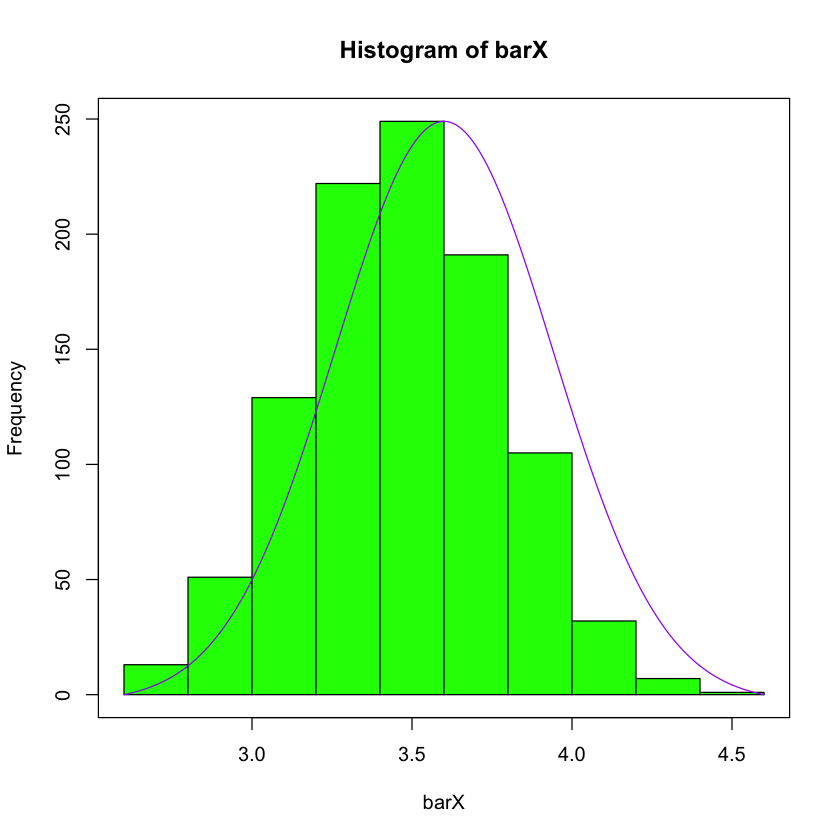

In [4]:
barX=rep(0,1000)
for (i in 1:1000){barX[i]=mean(sample(1:6,30,replace=T))}
mean(barX)
var(barX)
hist(barX,freq=NULL, col="Green")
par(new=TRUE)
plot(x,dnorm(x,mean=3.5,sd=0.34),type='l', xaxt="n", yaxt="n", xlab="", ylab="", col="purple")


## Making Inferences

### Continuous Outcome Data

Problem: Can we conclude patients with primary hypertension (PH), on average, have a higher
total cholesterol level than normotensive (NT) patients? 

Data: A random sample of patients was taken. Total cholesterol measurements (mg/dl) for 133 PH patients (Group 1) and 41 NT patients (Group 2) were reported.

In [5]:
Example_1=read.csv("Class9_Dataset1.csv", sep=",", header=T)
colnames(Example_1)<-c("Cholesterol", "Group")

Is this about averages?

Are our sample random?

Is this paired or independent sample data?

Does this data come from a normal or approximately normal distribution?

Remember CLT! 

In [6]:
#n1=133
n1=length(Example_1[Example_1[,2]==1,][,2])
#n2=41
n2=length(Example_1[Example_1[,2]==2,][,2])

Both are greater than 30, so CLT applies

### Check Assumptions: histograms and normal probability plots

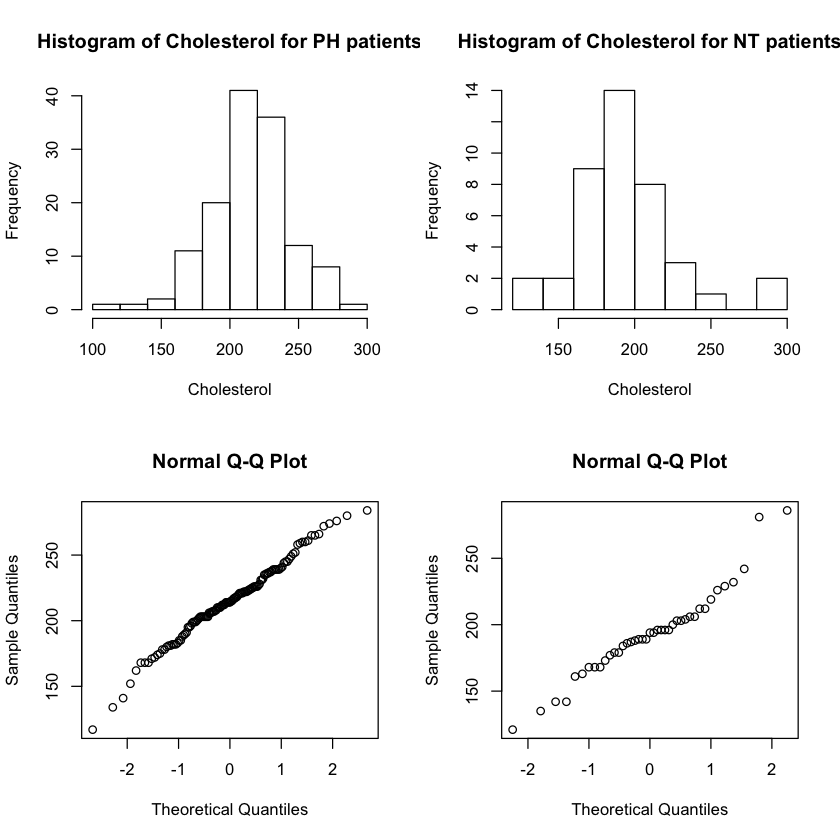

In [7]:
par(mfrow=c(2,2))
hist(Example_1[Example_1[,2]==1,][,1], main="Histogram of Cholesterol for PH patients", xlab="Cholesterol")
hist(Example_1[Example_1[,2]==2,][,1], main="Histogram of Cholesterol for NT patients", xlab="Cholesterol")
qqnorm(Example_1[Example_1[,2]==1,][,1])
qqnorm(Example_1[Example_1[,2]==2,][,1])

### Check Assumptions: variances equal?

[1] 29.65064

[1] 33.04483

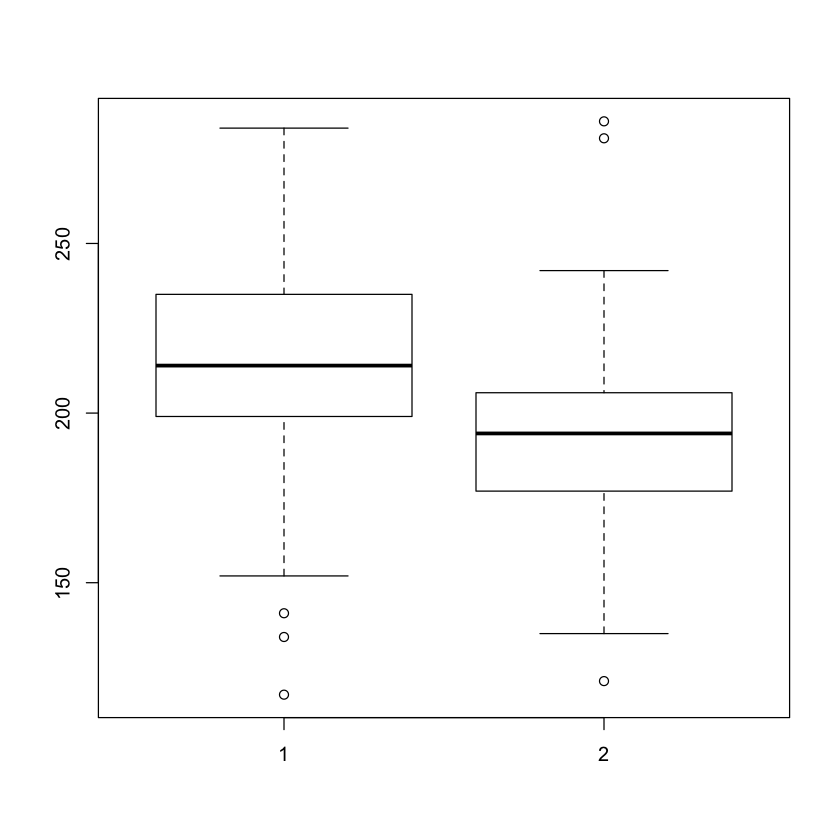

In [8]:
par(mfrow=c(1,1))
boxplot(Example_1$Cholesterol~Example_1$Group)
sqrt(var(Example_1[Example_1[,2]==1,][,1]))
sqrt(var(Example_1[Example_1[,2]==2,][,1]))

### State hypotheses:

$H_0:\mu_{ph}=\mu_{nt}$

$H_a: \mu_{ph} > \mu_{nt}$


In [11]:
T1=t.test(Example_1$Cholesterol~Example_1$Group, alternative="greater", var.equal=T)
T1
T2=t.test(Example_1$Cholesterol~Example_1$Group, alternative="greater", var.equal=F)
T2


	Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.9531, df = 172, p-value = 5.624e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 12.51683      Inf
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 



	Welch Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.7323, df = 61.178, p-value = 0.0002091
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 11.88959      Inf
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 


In [9]:
?t.test

Our test statistic is t=3.953 with df=172 and a p-value of .0000562.  

This p-value is very small, so we reject $H_0$ and say that the true difference in the means of cholesterol between PH and NT patients is greater than 0.  

OR, we could say: The true mean of PH patient's cholesterol is greater than the true mean of NT patient's cholesterol.

The mean difference between PH and NT patients has a 95% confidence interval of (12.417, infinity) 
    * (remember: it is infinity because it is a one-sided test)

## some other alternative hypotheses: how a p-value is calculated
### $H_A: \mu_{ph} < \mu_{nt}$

In [12]:
t.test(Example_1$Cholesterol~Example_1$Group, alternative="less", var.equal=T)
##note: 
1-T1$p.value


	Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.9531, df = 172, p-value = 0.9999
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
    -Inf 30.5215
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 


[1] 0.9999438

### $H_A: \mu_{ph} \neq \mu_{nt}$

In [13]:
t.test(Example_1$Cholesterol~Example_1$Group, alternative="two.sided", var.equal=T)
2*T1$p.value
#Note: Since this is a two-sided test, the 95% confidence interval is bounded by two sides--(10.77, 32.26)


	Two Sample t-test

data:  Example_1$Cholesterol by Example_1$Group
t = 3.9531, df = 172, p-value = 0.0001125
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.77439 32.26394
sample estimates:
mean in group 1 mean in group 2 
       214.7143        193.1951 


[1] 0.0001124891

### Categorical Outcome Data

Problem: Is there an association between morbidity index and treatment in the population?

Data: NIH Sponsored Women's Health Initiative Study Trial in which postmenopausal women were randomly assigned either estrogen (treatment) or a placebo (control). Estrogen-exposed group comprised of 8506 subjects. Placebo comprised of 8102 subjects. Incidents of a combined index outcome (coronary disease, stroke, pulmonary embolism, breast cancer, etc.) were tallied.
After 5 years, the estrogen-exposed group had 751 incidents and the control group had 623 incidents.





In [15]:
##create 2x2 table
Example_2<-as.table(matrix(c(751,623,7755,7479), nrow=2, ncol=2, dimnames=list(c("Group1:exposed", "Group2:unexposed "), c("Disease", "No disease" ))))
###tables can also be created from individual data using the function table()
Example_2

##H0: no association between morbidity index and treatment in the population; p1-p2=0
##Ha: association between morbidity index and treatment the population p1-p2=0

#incidence of combined morbidity index
n1=Example_2[1,2]+Example_2[1,1]
n2=Example_2[2,1]+Example_2[2,2]
incidence_exposed=Example_2[1,1]/n1  ####p1
incidence_unexposed=Example_2[2,1]/n2  ####p2
incidence_exposed
incidence_unexposed


                  Disease No disease
Group1:exposed        751       7755
Group2:unexposed      623       7479

[1] 0.08829062

[1] 0.07689459

In [16]:
###Chi-square test
Test_2=chisq.test(Example_2, correct=F)
Test_2
#often times, we use something called continuity correction when we are using a continuous function (like the Chi-square) to approximate a discrete function (like binomial)
# to enable continuity correction, change Test=chisq.test(Ex1, correct=T)


	Pearson's Chi-squared test

data:  Example_2
X-squared = 7.1014, df = 1, p-value = 0.007703


In [17]:
####check assumptions, expected count at least 80% of cells >5: 
Test_2$expected
#all cells are greater than 5

#df=(r-1)*(c-1)=(2-1)*(2-1)=1
#Test statistic=7.101
#p-value is P(X^2>7.101)=.008
#this p-value can also be found this way: 1-pchisq(7.1014,1)


,Disease,No disease
Group1:exposed,703.7117,7802.288
Group2:unexposed,670.2883,7431.712


This is a small p-value, so we reject H0 and say there is an association 
between morbidity index and treatment the population



In [22]:
Test_2$p.value

[1] 0.007702585

Example Kayexelate and colonic necrosis: one-sided test (Basic Biostatistics: Statistics for Public Health Practice 17.3)



### Example: Small Counts

Problem: Sodium polystyrene in sorbitol is suspected of causing an adverse reaction leading to colonic necrosis.  Is there an association between drug and colonic necrosisin the population?

Data: A study compared the incidence of colonic necrosis in 117 Kayexelate-exposed and 862
nonexposed postsurgical patients.  Two cases occurred in the kayexelate-exposed group (Group 1); No cases occurred in the nonexposed group


In [23]:
##create 2x2 table
Example_3<-as.table(matrix(c(2,0,115,862), nrow=2, ncol=2, dimnames=list(c("Group1:exposed", "Group2:unexposed "), c("Disease", "No disease" ))))
Example_3

                  Disease No disease
Group1:exposed          2        115
Group2:unexposed        0        862

In [25]:
###incidence estimates
n1=Example_3[1,2]+Example_3[1,1]
n2=Example_3[2,1]+Example_3[2,2]
incidence_exposed=Example_3[1,1]/n1  ####p1
incidence_unexposed=Example_3[2,1]/n2  ####p2
incidence_exposed
incidence_unexposed

##H0: no association between drug and colonic necrosis in the population; p1-p2=0
##Ha: association between drug and colonic necrosisin the population p1-p2 >0


[1] 0.01709402

[1] 0

In [26]:
####check assumptions, expected count at least 80% of cells >5: 
Test_3=chisq.test(Example_3)
Test_3$expected


Warning message in chisq.test(Example_3):
“Chi-squared approximation may be incorrect”

,Disease,No disease
Group1:exposed,0.2390194,116.761
Group2:unexposed,1.7609806,860.239


In [28]:
###two cells <5...use fisher exact
Test_3=fisher.test(Example_3, alternative="greater")
Test_3


	Fisher's Exact Test for Count Data

data:  Example_3
p-value = 0.01417
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 2.132119      Inf
sample estimates:
odds ratio 
       Inf 


In [27]:
?fisher.test

p-value=.014, which is small, so we reject H0 and say that there is an association 
between drug and colonic necrosisin the population.

There is a difference in the proportions of colonic necrosis between those exposed 
to the drug and those not the evidence is strong that those exposed to the drug versus 
those that are not are not equally likely to have colonic neccrosisin.

### Example: Paired Data

Example Smoking and Mortality in Matched Data (Basic Biostatistics: Statistics for Public Health Practice 18.6)

Problem: Smoking was first suspected as causing premature mortality.  The hypothesis is that people who are genetically disposed to risk taking and adverse health outcomes were more likely to smoke, and hence more likely to experience premature death. 

Data: 22 smoking-discordant monozygotic twins were studies to see which twin first succumbed to death.  The smoking-twin died first in 17 pairs and non-smoking died first in 5 instances


In [33]:
###create 2x2 table
Example_4<-as.table(matrix(c(0,5,17,0), nrow=2, ncol=2, dimnames=list(c("Yes Died Smoking Twin", "No Died Smoking Twin "), c("Yes Died Non-Smoking Twin", "No Died Non-Smoking Twin" ))))
###tables can also be created from individual data using the function table()
###Normal Approximation Method: McNemar 
##H0: no association between smoking and earlier mortality in the population; 
##marginal probabilities for each outcome are the same p_a+p_b=p_c+p_d
##Ha: association between smoking and earlier mortality in the population
Example_4

                      Yes Died Non-Smoking Twin No Died Non-Smoking Twin
Yes Died Smoking Twin                         0                       17
No Died Smoking Twin                          5                        0

In [30]:
#Check assumption b+c>20: 5+17>20 
##without continuity correction
mcnemar.test(Example_4, correct=F)
#with continuity correction
mcnemar.test(Example_4, correct=T)


	McNemar's Chi-squared test

data:  Example_4
McNemar's chi-squared = 6.5455, df = 1, p-value = 0.01052



	McNemar's Chi-squared test with continuity correction

data:  Example_4
McNemar's chi-squared = 5.5, df = 1, p-value = 0.01902


In [31]:
#Test statistic: X^2=5.5
#df=1
#p-value=.01902
#same as
1-pchisq(5.5,1)
#1-P(X^2<5.5)=P(X^2>5.5)

[1] 0.01901647

So, we reject $H_0$ and say that there is an association between smoking and earlier mortality 
in the population.  The proportions of Dead Smoking twin and Dead non-smoking twin are different. 

### Using Binomial Exact Method

In [32]:
##H0: no association between smoking and earlier mortality in the population; 
#marginal probabilities for each outcome are the same p_a+p_b=p_c+p_d
##Ha: association between smoking and earlier mortality in the population

#number of discordant pairs n=17+5 Bernouilli Trials
n=Example_4[1,2]+Example_4[2,1]
n
###proportion of positive discordancies
p=Example_4[1,2]/n
p
###number of successes
x=Example_4[1,2]
x

[1] 22

[1] 0.7727273

[1] 17

In [34]:
###binomial test
binom.test(x,n, alternative=c("two.sided"))


	Exact binomial test

data:  x and n
number of successes = 17, number of trials = 22, p-value = 0.0169
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5462964 0.9217937
sample estimates:
probability of success 
             0.7727273 


Based on our sample data, we are 95% confident that the true difference of proportions is between .5463 and .9218.
p-value=.0169 which is slightly smaller than our chi-square approximation.